In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [29]:
#Load the data set
# import pandas as pd
#from google.colab import files
#claimaints = files.upload()
claimants = pd.read_csv("C:/Users/DELL/Desktop/DS_Vikas_Class/Python_Class10_Logistic_Regression/claimants.csv")
claimants.head()

## in US, met an accident and claim the insurance

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [30]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [31]:
#Shape of the data set
claimants.shape

(1340, 6)

In [32]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [33]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [34]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [35]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [36]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [37]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [59]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
#classfier.write_to_pickle('path of file.pkl')

LogisticRegression()

In [19]:
#Predict for X dataset
#classfier.read_to_pickle('path of file.pkl')
y_pred = classifier.predict(X)

In [21]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [22]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [20]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [18]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [23]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [26]:
# Calculation for Accuracy
# Formula: (TP+TN)/(FP+FN+TP+TN)
# Multiply 100 to get percentage
((381+395)/(381+197+123+395))*100

70.8029197080292

In [25]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

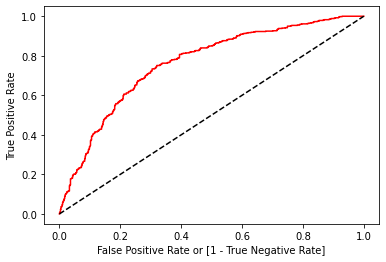

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [28]:
auc


0.7108589063606365

In [38]:
#### train test split

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state=42)

In [42]:
x_train.shape,x_test.shape

((876, 5), (220, 5))

In [43]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [44]:
classifier.score(x_train,y_train)

0.7146118721461188

In [46]:
classifier.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [48]:
classifier.score(x_test,y_test)

0.6772727272727272

Text(0.5, 15.0, 'Predicted')

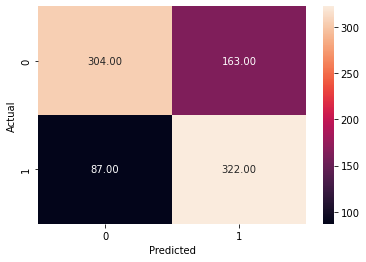

In [58]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_train, classifier.predict(x_train))
sns.heatmap(log_cm, annot=True, fmt='.2f',
            xticklabels=["0","1"],yticklabels=["0","1"])
                
plt.ylabel('Actual')
plt.xlabel('Predicted')